In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Read-in the dataset
df = pd.read_csv('drive/MyDrive/GovTech/FullFunctioning/bhutan_landslide_data.csv')

In [5]:
df.head(5)

,FID,Type,Code,Lithology,Altitude,Slope,Total curvature,Aspect,Distance to road,Distance to stream,Slope length,TWI,STI
0,0,slide,1,1,1,2,1,7,1,5,2,4,1
1,1,slide,1,1,1,3,1,4,2,2,2,5,1
2,2,slide,1,1,1,2,3,7,1,1,1,3,0
3,3,slide,1,1,1,3,1,10,1,2,2,4,0
4,4,slide,1,1,1,3,1,10,1,4,3,5,0


In [6]:
df = df[df.columns[2:]]
df

,Code,Lithology,Altitude,Slope,Total curvature,Aspect,Distance to road,Distance to stream,Slope length,TWI,STI
0,1,1,1,2,1,7,1,5,2,4,1
1,1,1,1,3,1,4,2,2,2,5,1
2,1,1,1,2,3,7,1,1,1,3,0
3,1,1,1,3,1,10,1,2,2,4,0
4,1,1,1,3,1,10,1,4,3,5,0
...,...,...,...,...,...,...,...,...,...,...,...
1216,1,5,4,2,1,7,1,1,2,5,1
1217,1,5,4,2,2,8,1,1,2,1,0
1218,1,5,5,3,2,8,1,5,2,4,0
1219,1,5,4,2,3,7,1,2,1,0,0


Rearrange columns

In [7]:
df.columns

Index(['Code', 'Lithology', 'Altitude', 'Slope', 'Total curvature', 'Aspect',
       'Distance to road', 'Distance to stream', 'Slope length', 'TWI', 'STI'],
      dtype='object')

In [8]:
categorical_variables = ['Lithology', 'Altitude', 'Slope', 'Total curvature',
       'Distance to road', 'Distance to stream', 'Slope length', 'TWI', 'STI','Code']
non_categorical_variables = list(set(df.columns) - set(categorical_variables))

# Re-ordering columns to have non-categorical varaibles first
order = non_categorical_variables + categorical_variables
df = df[order]

In [9]:
df

,Aspect,Lithology,Altitude,Slope,Total curvature,Distance to road,Distance to stream,Slope length,TWI,STI,Code
0,7,1,1,2,1,1,5,2,4,1,1
1,4,1,1,3,1,2,2,2,5,1,1
2,7,1,1,2,3,1,1,1,3,0,1
3,10,1,1,3,1,1,2,2,4,0,1
4,10,1,1,3,1,1,4,3,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1216,7,5,4,2,1,1,1,2,5,1,1
1217,8,5,4,2,2,1,1,2,1,0,1
1218,8,5,5,3,2,1,5,2,4,0,1
1219,7,5,4,2,3,1,2,1,0,0,1


Calculate information gain (IG)

In [10]:
features = df.columns[:-1]

# Separating out the features
X = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['Code']].values

In [11]:
from sklearn.feature_selection import mutual_info_classif

res = dict(zip(features,
               mutual_info_classif(X, y.ravel(), discrete_features=[-1, -2, -3, -4])
               ))

In [12]:
res = {k: v for k, v in sorted(res.items(), key=lambda item: item[1], reverse=True)}
res

{'Distance to road': 0.21794030506209117,
 'Altitude': 0.13492173200732704,
 'Aspect': 0.022168007257052258,
 'Distance to stream': 0.00812757988929078,
 'Slope': 0.004844692943560158,
 'Slope length': 0.0037811561614317767,
 'TWI': 0.0029604814410724017,
 'STI': 0.002436377041966622,
 'Lithology': 0.0,
 'Total curvature': 0.0}

One hot encode categorical variables

In [13]:
from sklearn.preprocessing import OneHotEncoder

# Add numerical feature names to final feature name list
final_feature_names = []
final_feature_names += non_categorical_variables

# List of categorical feature names
categorical_features = ['Lithology', 'Altitude', 'Slope', 'Total curvature',
       'Distance to road', 'Distance to stream', 'Slope length', 'TWI', 'STI']

# Copy numerical features
data = df[non_categorical_variables]

# Copy one-hot encoded categorical features
for i in categorical_features:
    encoded = OneHotEncoder(sparse=False).fit_transform(df[i].values.reshape(df.shape[0],1))
    cols = [i+'_'+str(j) for j in range (1, encoded.shape[1]+1)]
    data = pd.concat([data, pd.DataFrame(encoded, columns=cols)], axis = 1)

# Copy labels
data = pd.concat([data, df[['Code']]], axis = 1)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` 

In [14]:
data

,Aspect,Lithology_1,Lithology_2,Lithology_3,Lithology_4,Lithology_5,Lithology_6,Altitude_1,Altitude_2,Altitude_3,...,TWI_4,TWI_5,TWI_6,TWI_7,STI_1,STI_2,STI_3,STI_4,STI_5,Code
0,7,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
1,4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1
2,7,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
3,10,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
4,10,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216,7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1
1217,8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
1218,8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
1219,7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1


Feature scaling


In [15]:
from sklearn.preprocessing import StandardScaler

# Stan
features = data.columns[:-1]

# Separating out the features
X = data.loc[:, features].values

# Separating out the target
y = data.loc[:,['Code']].values

X = StandardScaler().fit_transform(X)

In [16]:
X.shape

(1221, 53)

Principal Component Analysis

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=0)

principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [18]:
finalDf = pd.concat([principalDf, data[['Code']]], axis = 1)

In [19]:
finalDf

,principal component 1,principal component 2,Code
0,-2.665631,-0.743084,1
1,-1.846311,-1.741905,1
2,-2.562725,2.290298,1
3,-2.773802,-2.013929,1
4,-2.573325,-1.834164,1
...,...,...,...
1216,0.374624,-1.101143,1
1217,0.615717,1.076620,1
1218,0.363825,-0.860968,1
1219,0.439425,2.723340,1


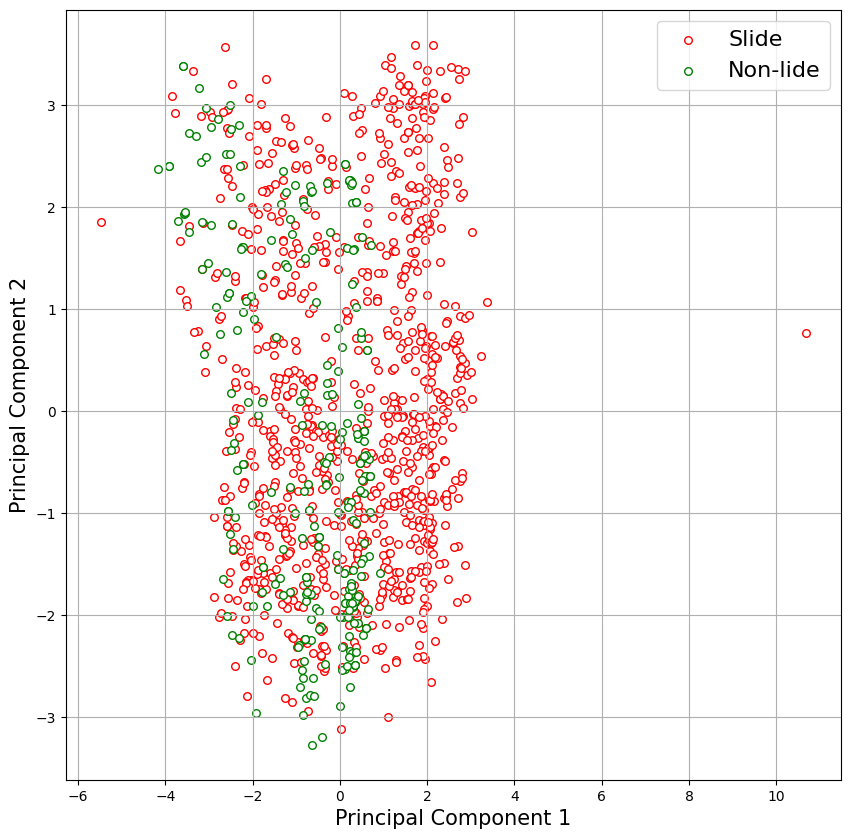

In [20]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Code'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               c = 'white',
#                c = color,
               edgecolors = color,
               s = 30,
#                alpha = 0.25
              )
ax.legend(['Slide','Non-lide'], fontsize =16)
ax.grid()
plt.savefig(os.path.join('drive/MyDrive/GovTech/FullFunctioning/figures','pca.png'), dpi = 300)

Splitting dataset for training and testing

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

Machine Learning Algorithms

In [23]:
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve

Random Forest

Hyperparameter(s):


*   n_estimators
*   max_features
*   max_depth
*   criterion

Hyperparameter optimization

In [24]:
model = RandomForestClassifier(random_state=0)

param_grid = { 
    'n_estimators': [10, 20, 30],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : np.arange(10,30,2),
    'criterion' :['gini', 'entropy']
}

grid = GridSearchCV(estimator=model, param_grid=param_grid)

grid.fit(X_train, y_train.ravel())

n_estimators = grid.best_estimator_.n_estimators
criterion = grid.best_estimator_.criterion
max_depth = grid.best_estimator_.max_depth
max_features = grid.best_estimator_.max_features

# summarize the results of the grid search
print('Best score:', grid.best_score_)
print('Best hyperparameters:',grid.best_params_)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

Best score: 0.9168489852081183
Best hyperparameters: {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'auto', 'n_estimators': 20}


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Train on optimal hyperparameters

In [25]:
rf = RandomForestClassifier(random_state=0, criterion=criterion, max_depth=max_depth, max_features=max_features, n_estimators = n_estimators).fit(X_train, y_train.ravel())


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Get predictions and probabilities on test set



In [26]:
rf_pred = rf.predict(X_test)
rf_proba = rf.predict_proba(X_test)

Performance metrics

In [27]:
rf_conf_mat = confusion_matrix(y_test, rf_pred)
rf_acc = accuracy_score(y_test, rf_pred)
rf_roc_auc = roc_auc_score(y_test, rf_proba[:,1])

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba[:,1])
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_proba[:,1])

rf_cls_precision, rf_cls_recall, rf_cls_f1, _ = precision_recall_fscore_support(y_test, rf_pred, average=None, labels=[0,1])

print('Random Forest :')
print('\nConfusion matrix:\n',rf_conf_mat,'\n')
print('Accuracy:',rf_acc)
print('ROC AUC=%.4f' % (rf_roc_auc))
print('Precision on (Landslide = 0) = %.4f ' % (rf_cls_precision[0]))
print('Recall on (Landslide = 0) = %.4f ' % (rf_cls_recall[0]))
print('F1 on (Landslide = 0) = %.4f' % (rf_cls_f1[0]))
print('Precision on (Landslide = 1) = %.4f ' % (rf_cls_precision[1]))
print('Recall on (Landslide = 1) = %.4f ' % (rf_cls_recall[1]))
print('F1 on (Landslide = 1) = %.4f ' % (rf_cls_f1[1]))

Random Forest :

Confusion matrix:
 [[ 65  17]
 [ 15 270]] 

Accuracy: 0.9128065395095368
ROC AUC=0.9602
Precision on (Landslide = 0) = 0.8125 
Recall on (Landslide = 0) = 0.7927 
F1 on (Landslide = 0) = 0.8025
Precision on (Landslide = 1) = 0.9408 
Recall on (Landslide = 1) = 0.9474 
F1 on (Landslide = 1) = 0.9441 


Export trained and tested models

In [ ]:
#import joblib

#joblib.dump(rf, os.path.join('drive/MyDrive/GovTech/FullFunctioning/models','rf.pkl'), compress=9)

['drive/MyDrive/GovTech/FullFunctioning/models/rf.pkl']

Export performance metrics of models

In [34]:
perf_metr = pd.DataFrame(index = [
                        'Random Forest',
                       ],
             columns = ['Accuracy', 
                        'ROC AUC', 
                        'Precision on Landlside=0', 
                        'Recall on Landlside=0', 
                        'F1-score on Landlside=0', 
                        'Precision on Landlside=1', 
                        'Recall on Landlside=1', 
                        'F1-score on Landlside=1']
            )

In [35]:
rf_perf_metr = pd.Series([rf_acc, rf_roc_auc, rf_cls_precision[0], rf_cls_recall[0], rf_cls_f1[0], rf_cls_precision[0],rf_cls_recall[0], rf_cls_f1[0]])

In [36]:
perf_metr.loc['Random Forest',:] = rf_perf_metr.values

In [37]:
perf_metr = perf_metr.astype(float).round(3)

In [38]:
perf_metr

,Accuracy,ROC AUC,Precision on Landlside=0,Recall on Landlside=0,F1-score on Landlside=0,Precision on Landlside=1,Recall on Landlside=1,F1-score on Landlside=1
Random Forest,0.913,0.96,0.812,0.793,0.802,0.812,0.793,0.802


ROC-AUC curves

<ipython-input-46-1743496f2a7b>:27: UserWarning: Legend does not support handles for list instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  ax.legend(handles,labels, fontsize=14)


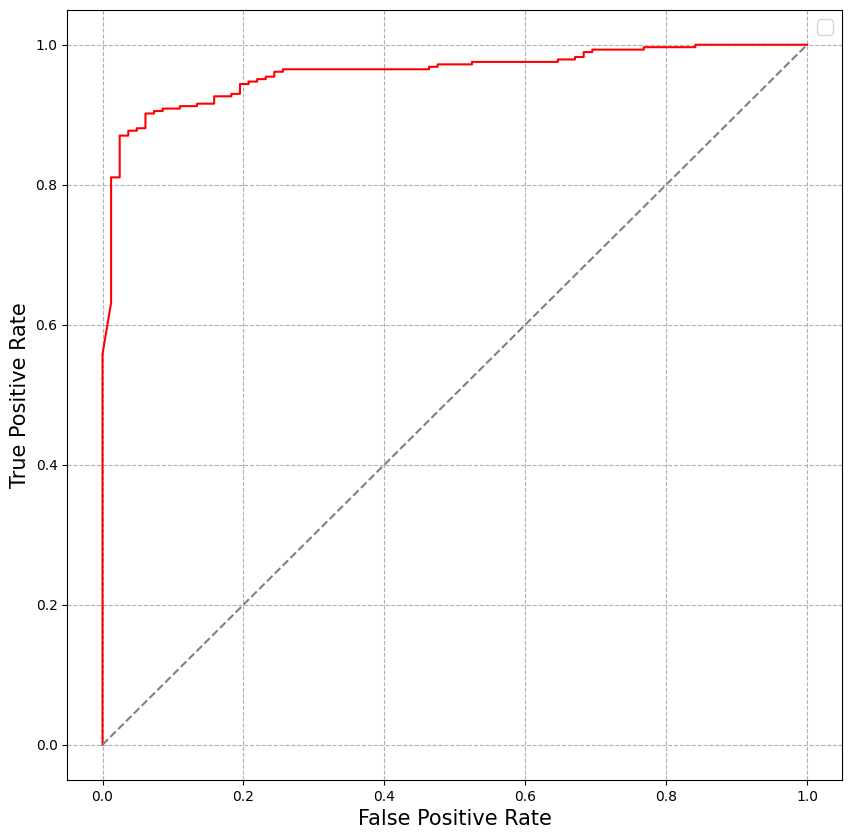

In [46]:
# calculate roc curves
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba[:,1])

fig, ax = plt.subplots(1, figsize=(10,10))

# fig.figure(figsize=(10,10))

# plot the roc curve for the model
# pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
ax.plot(rf_fpr, rf_tpr,  color = 'red', label='Random Forest (AUC: ' + str(np.round(rf_roc_auc,4))+')')
ax.plot([0,1],[0,1], color='grey', linestyle='dashed')

# axis labels
ax.set_xlabel('False Positive Rate', fontsize=15)
ax.set_ylabel('True Positive Rate', fontsize=15)

# show the legend
# plt.legend()

handles,labels = ax.get_legend_handles_labels()


handles = [handles]
labels = [labels]

ax.grid(linestyle='dashed')
ax.legend(handles,labels, fontsize=14)

plt.show()

In [49]:
import pickle
import os

with open(os.path.join('drive/MyDrive/GovTech/FullFunctioning/streamlit_APP/model/model_lr.pkl'), 'wb') as file:
    pickle.dump(rf, file)